# Problem Statement: A cloth manufacturing company is interested to know about the segment or attributes causes high sale.  

### Approach: A decision tree can be built with target variable Sale (we will first convert it in categorical variable) & all other variable will be independent in the analysis.  

### About the data: 

Let’s consider a Company dataset with around 10 variables and 400 records. The attributes are as follows: 

 Sales -- Unit sales (in thousands) at each location

 Competitor Price -- Price charged by competitor at each location

 Income -- Community income level (in thousands of dollars)

 Advertising -- Local advertising budget for company at each location (in thousands of dollars)

 Population -- Population size in region (in thousands)

 Price -- Price company charges for car seats at each site

 Shelf Location at stores -- A factor with levels Bad, Good and Medium indicating the quality of the shelving location for the car seats at each site

 Age -- Average age of the local population

 Education -- Education level at each location

 Urban -- A factor with levels No and Yes to indicate whether the store is in an urban or rural location

 US -- A factor with levels No and Yes to indicate whether the store is in the US or not

 

## Decision Tree is 
        the most powerful and popular tool for classification and prediction. A Decision tree is a flowchart-like tree structure, where each internal node denotes a test on an attribute, each branch represents an outcome of the test, and each leaf node (terminal node) holds a class label. 

Types of Decision Tree
1) C 5.0: It uses entropy (extent of impurity). Hence entropy should be lower.
    Entopy value ranges from 0 to 1 for 2 classes, and 0 to log2(n) for n classes.
    simply, entropy is no. of miscassified samples in otherwise pure region.
    Least entropy variable is taken as root node, whereas variable with 100% entropy is skipped, 
    
    Info gain determines whether to further split the node or not.
    IG = entropy before split - entropy after split
    if IG is +ve then split
    if IG is 0 or -ve dont split
    

        
2) CART: It can be used for both classification and regression. It uses gini index. Gini Index is a score that evaluates how 
        accurate a split is among the classified groups. Gini index evaluates a score in the range between 0 and 1, where 0 is when all observations belong to one class, and 1 is a random distribution of the elements within classes. In this case, we want to have a Gini index score as low as possible. Gini Index is the evaluation metrics we shall use to evaluate our Decision Tree Model. 


Pruning of decision tree: Decsion Tree can grow indefinitely by splitting the features until each example is perfectly classified or algorithm runs out of features. But if tree grows large then many decions would be specific and model will be overfitted to training data. 
    Means, as depth increases, sample size decreases, confidence decreases, overfitting increases.
    Ways to pruning tree: set maximum depth or minimum sample size 

In [1]:
#Importing necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
 
import sklearn 
from sklearn.model_selection import train_test_split  , KFold , cross_val_score,  GridSearchCV
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings('ignore') 

In [2]:
#Loading dataset
data = pd.read_csv('Company_Data.csv')
data.head() 

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


# Descriptive Statistics 

In [3]:
data.isna().sum().sum()

0

In [4]:
data.duplicated().sum()

0

In [5]:
data.shape

(400, 11)

In [6]:
data.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [8]:
#categorical_features

categorical_features = [feature for feature in data.columns if data[feature].dtypes == 'O']
print('categorical_features:', categorical_features) 

categorical_features: ['ShelveLoc', 'Urban', 'US']


In [9]:
numeric_features = [feature for feature in data.columns if data[feature].dtypes != 'O']
print('numeric features:', numeric_features, '\n') 

numeric features: ['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price', 'Age', 'Education'] 



# Feature Engineering 

In [10]:
#Converting sales into categorical feature
# we will make 3 categories in sales like low, medium and good sales. 

<AxesSubplot:xlabel='Sales', ylabel='Count'>

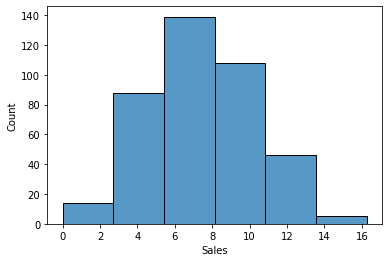

In [11]:
sns.histplot(data.Sales, bins=6)
#Almost normal distribution

In [12]:
data.Sales.max() / 3 

# diving by 3 since we are making 3 categories
# each category with width 5.42

5.423333333333333

In [13]:
data1 = data.copy()
data1['Sales_category'] = pd.cut(x = data1['Sales'], bins = [0, 5.5 ,11, 17], labels=['Low','Medium','High'], right = False)
data1 = data1.drop(columns=['Sales'])

In [14]:
data1.head()

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Sales_category
0,138,73,11,276,120,Bad,42,17,Yes,Yes,Medium
1,111,48,16,260,83,Good,65,10,Yes,Yes,High
2,113,35,10,269,80,Medium,59,12,Yes,Yes,Medium
3,117,100,4,466,97,Medium,55,14,Yes,Yes,Medium
4,141,64,3,340,128,Bad,38,13,Yes,No,Low


# Visualisation 

<AxesSubplot:xlabel='Sales_category', ylabel='count'>

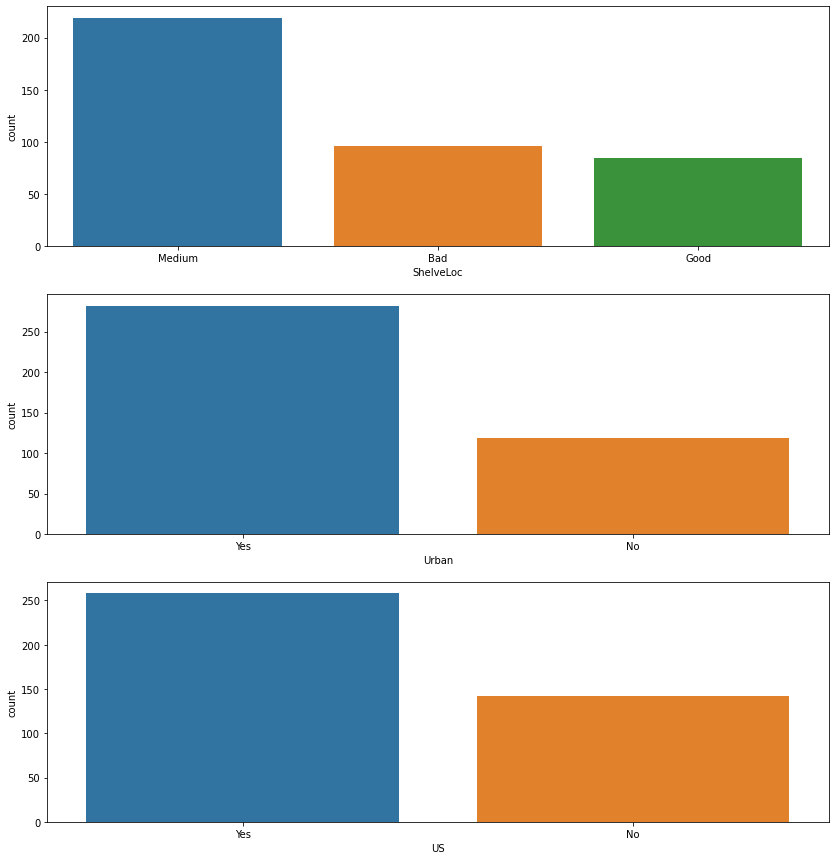

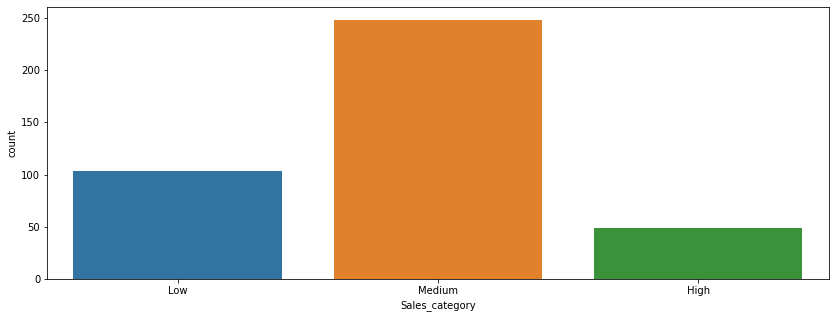

In [15]:
# for categorical_features -- barplot
fig, axes=plt.subplots(len(categorical_features),1,figsize=(14,15))

for i in range (0, len(categorical_features)):
    sns.countplot(data[categorical_features[i]],ax=axes[i], order=data[categorical_features[i]].value_counts().index)

plt.figure(figsize=(14,5))
sns.countplot(data1['Sales_category'])

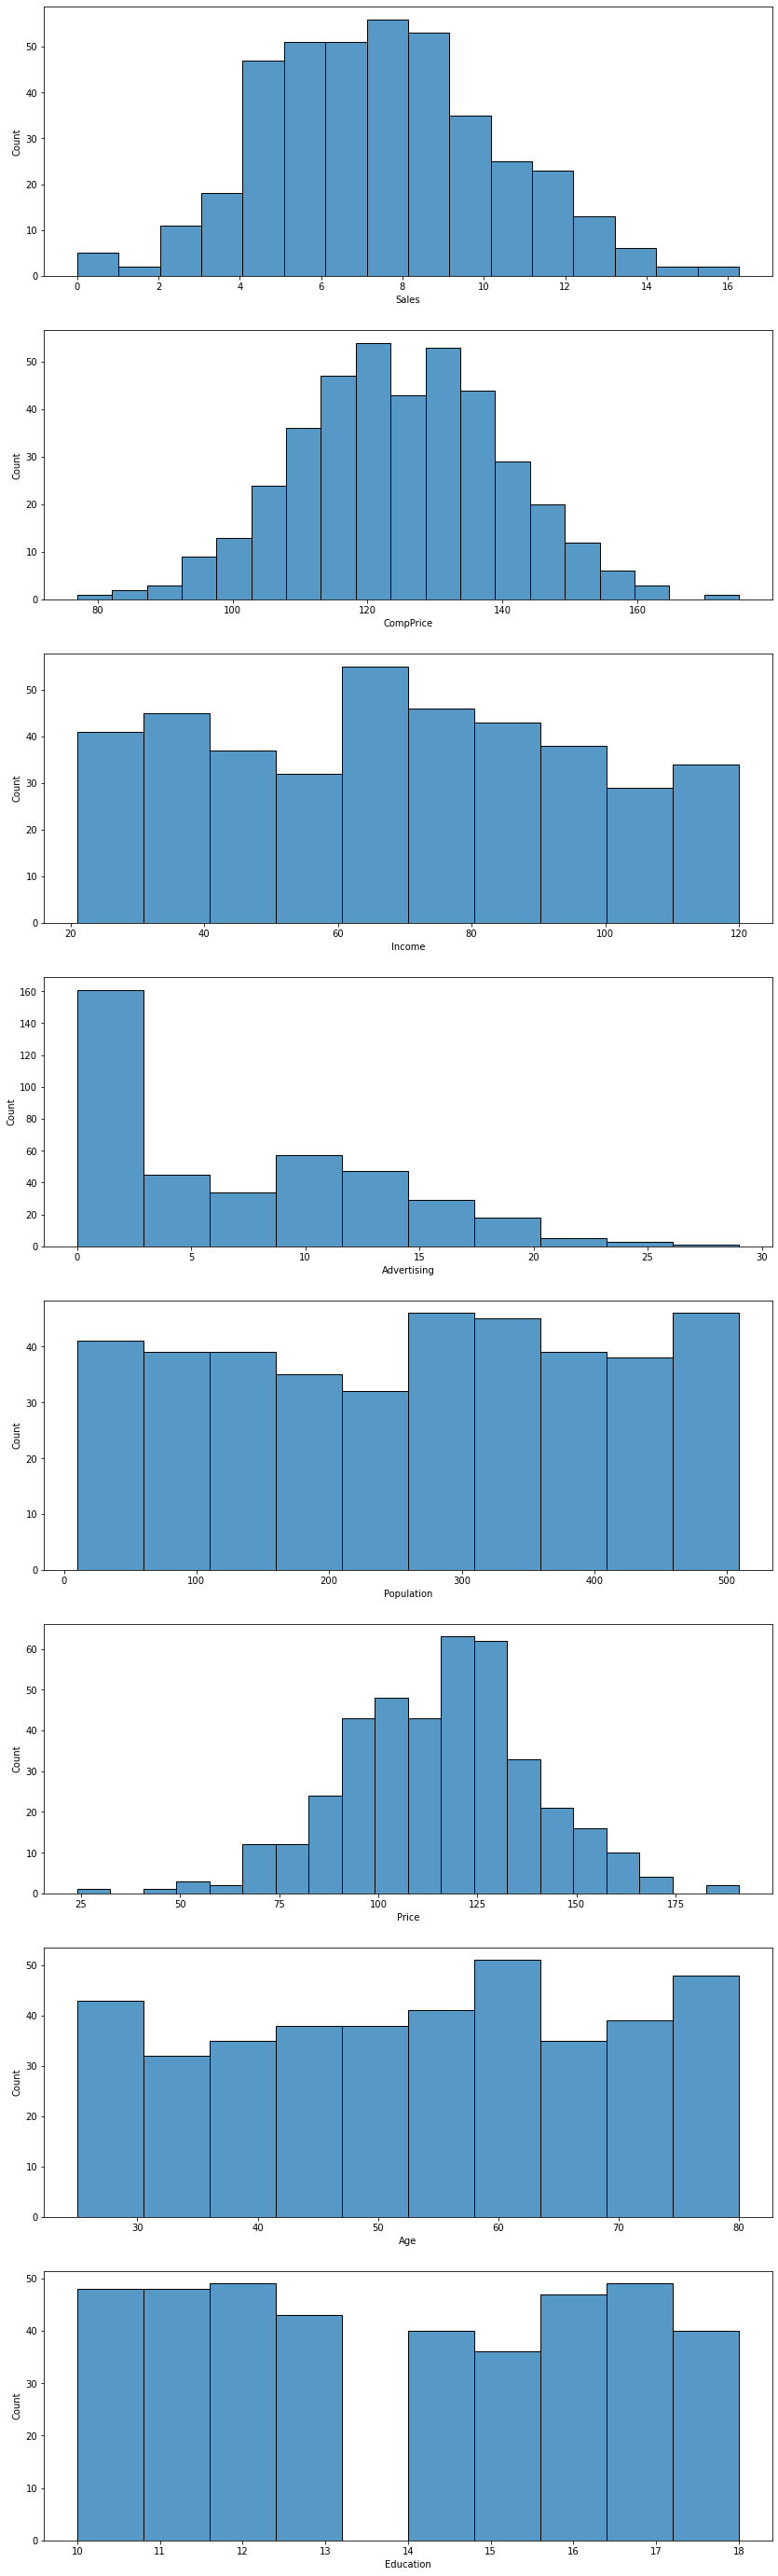

In [16]:
# for numerical_features -- histogram
fig, axes=plt.subplots(len(numeric_features),1,figsize=(14,50))

for i in range (0, len(numeric_features)):
    sns.histplot(data[numeric_features[i]],ax=axes[i])
    

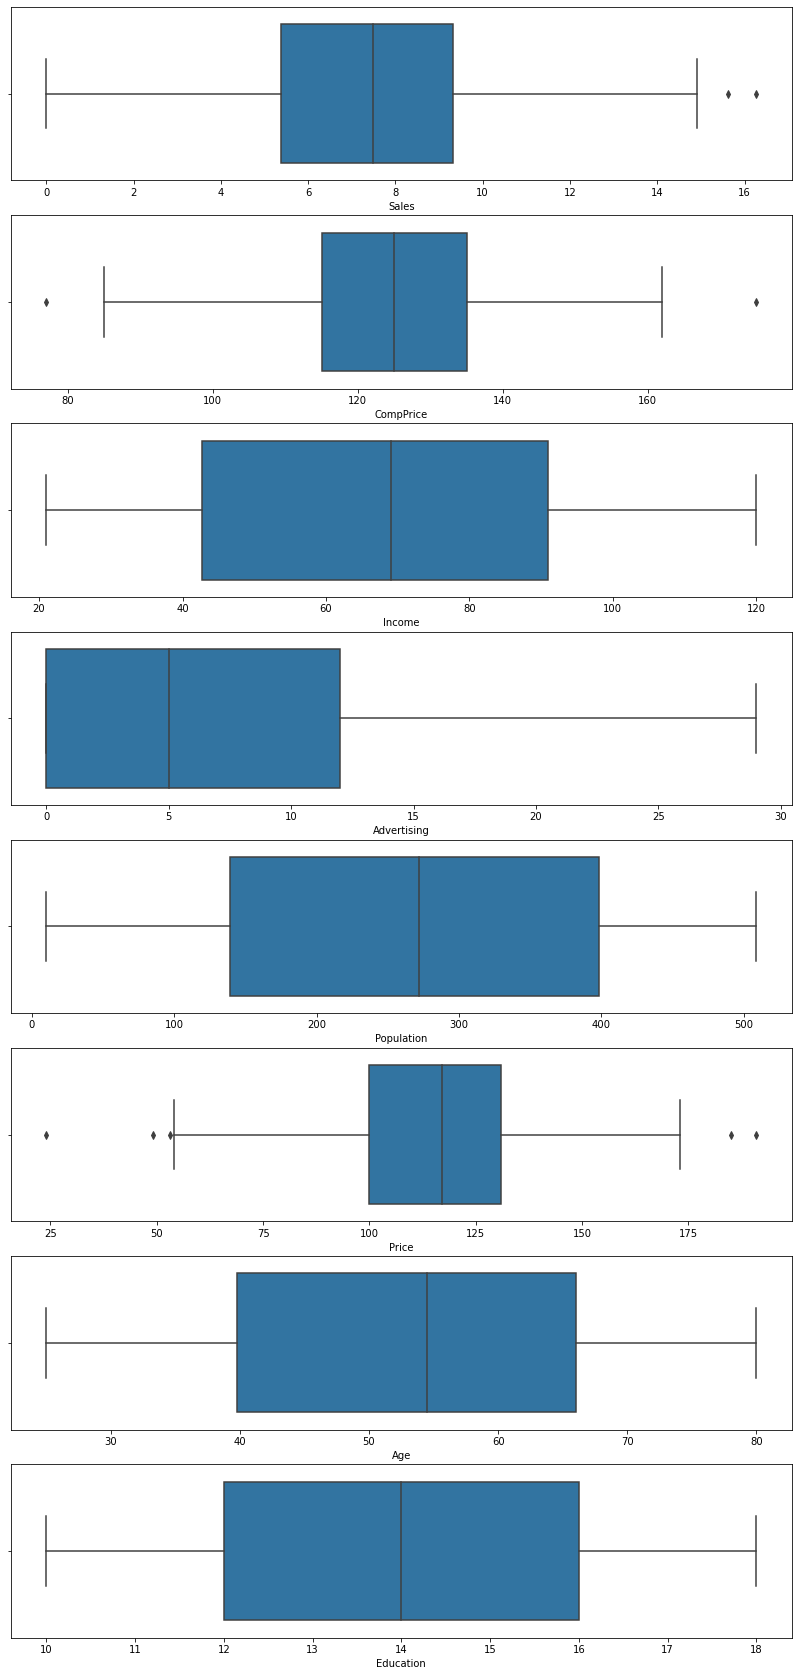

In [17]:
# Boxplot for outlier detection

fig, axes=plt.subplots(len(numeric_features),1,figsize=(14,30))

for i in range (0, len(numeric_features)):
    sns.boxplot(data[numeric_features[i]],ax=axes[i])
    

In [18]:
data2 = data1.copy()

for feature in numeric_features:
    Q1,Q3 = np.percentile(data[feature], [25,75])
    IQR = Q3 - Q1
    ul = Q3+1.5*IQR
    ll = Q1-1.5*IQR
    outliers = data[feature][(data[feature] < ll) |  (data[feature] > ul)]
    
    data2=data2.drop(outliers.index[:] , errors="ignore")
    
    outliers=0 

In [19]:
data1.shape

(400, 11)

In [20]:
data2.shape 

(392, 11)

 8 outliers are dropped

# Data Pre-Processing 

In [21]:
y = data2['Sales_category']
x= data2.drop(['Sales_category'], axis=1)  

In [22]:
x = pd.get_dummies(x) # encoding input categorical variables 

In [23]:
le = LabelEncoder()
y = le.fit_transform(y) # encoding output categorical variables

In [24]:
# Splitting data into training and testing data set
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.2,random_state=40)

In [25]:
print("Shape of X_train: ",x_train.shape)
print("Shape of X_test: ", x_test.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of y_test",y_test.shape) 

Shape of X_train:  (313, 14)
Shape of X_test:  (79, 14)
Shape of y_train:  (313,)
Shape of y_test (79,)


## Feature selection

In [26]:
#Feature importance
from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest, chi2 

In [27]:
# feature extraction
test = SelectKBest(score_func=chi2, k=4)
fit = test.fit(x, y) 

In [28]:
# summarize scores
scores = fit.scores_
features = fit.transform(x) 

In [29]:
score_df = pd.DataFrame(list(zip(scores, x.columns)),
               columns =['Score', 'Feature'])
score_df.sort_values(by="Score", ascending=False, inplace=True)
score_df 

,Score,Feature
4,193.077575,Price
2,131.019973,Advertising
5,93.806019,Age
8,69.563239,ShelveLoc_Good
1,63.584603,Income
7,47.066783,ShelveLoc_Bad
3,32.699398,Population
9,12.340114,ShelveLoc_Medium
12,6.672444,US_No
0,4.655268,CompPrice


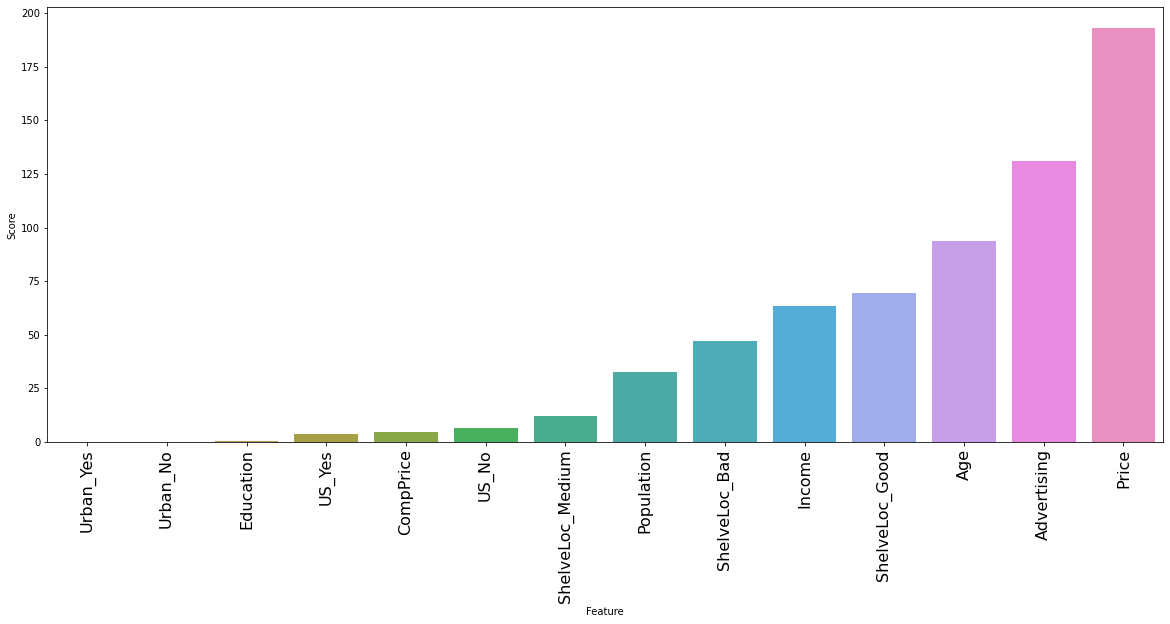

In [30]:
plt.figure(figsize=(20,8))
sns.barplot(x='Feature', y="Score", data=score_df, order=score_df.sort_values('Score').Feature) 
plt.xticks(rotation = 90, fontsize = 16)
plt.show()

In [31]:
model_data_x = x[['Price','Advertising','Population','Income','Age','ShelveLoc_Good','ShelveLoc_Bad',
                  'ShelveLoc_Medium', 'US_No','CompPrice']]

In [32]:
model_data_x 

,Price,Advertising,Population,Income,Age,ShelveLoc_Good,ShelveLoc_Bad,ShelveLoc_Medium,US_No,CompPrice
0,120,11,276,73,42,0,1,0,0,138
1,83,16,260,48,65,1,0,0,0,111
2,80,10,269,35,59,0,0,1,0,113
3,97,4,466,100,55,0,0,1,0,117
4,128,3,340,64,38,0,1,0,1,141
...,...,...,...,...,...,...,...,...,...,...
395,128,17,203,108,33,1,0,0,0,138
396,120,3,37,23,55,0,0,1,0,139
397,159,12,368,26,40,0,0,1,0,162
398,95,7,284,79,50,0,1,0,0,100


In [33]:
model_data_y = y 
model_data_y 

array([2, 0, 2, 2, 1, 2, 2, 0, 2, 1, 2, 0, 1, 2, 0, 2, 2, 0, 0, 2, 2, 0,
       1, 2, 2, 0, 2, 1, 1, 2, 0, 2, 2, 2, 1, 0, 2, 1, 2, 1, 1, 2, 1, 1,
       1, 0, 1, 1, 2, 1, 1, 2, 2, 1, 2, 0, 1, 1, 1, 2, 2, 1, 2, 2, 1, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 1, 2, 2, 2, 0, 1, 1, 2, 2, 0, 2,
       2, 1, 1, 1, 2, 2, 2, 2, 2, 0, 1, 1, 2, 1, 1, 1, 2, 1, 2, 1, 2, 2,
       2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 1, 1, 2, 2, 2, 2,
       1, 2, 1, 2, 2, 0, 2, 2, 2, 1, 2, 2, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2,
       2, 2, 0, 2, 1, 1, 1, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2,
       1, 2, 1, 1, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 1, 1, 1, 1, 2, 2, 2,
       1, 1, 2, 2, 1, 2, 2, 1, 1, 2, 0, 2, 1, 1, 2, 1, 2, 2, 2, 2, 2, 1,
       1, 2, 2, 2, 1, 0, 1, 2, 0, 2, 2, 2, 2, 2, 2, 1, 2, 0, 1, 2, 2, 2,
       2, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 1, 1, 2, 2, 2, 2, 2, 1, 2, 2,
       2, 1, 0, 1, 0, 2, 2, 2, 2, 2, 2, 1, 1, 0, 2, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 0, 0, 0, 1, 2, 1, 2, 2, 2, 2, 1, 2, 0,

In [34]:
# Splitting data into training and testing data set
x_train, x_test,y_train,y_test = train_test_split(model_data_x, model_data_y, test_size=0.2,random_state=40)

# Building Decision Tree Classifier 

## a) using Entropy Criteria with train test split

In [35]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=4)
model.fit(x_train,y_train) 

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [36]:
#Predicting on test data
pred = model.predict(x_test) # predicting on test data set 
pred  

array([0, 1, 2, 2, 0, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2,
       0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 0, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 1, 1, 1, 2])

In [37]:
pd.crosstab(y_test,pred) 

col_0,0,1,2
row_0,,,
0,1,0,7
1,0,6,13
2,4,6,42


In [38]:
# Accuracy 
np.mean(pred==y_test)  

0.620253164556962

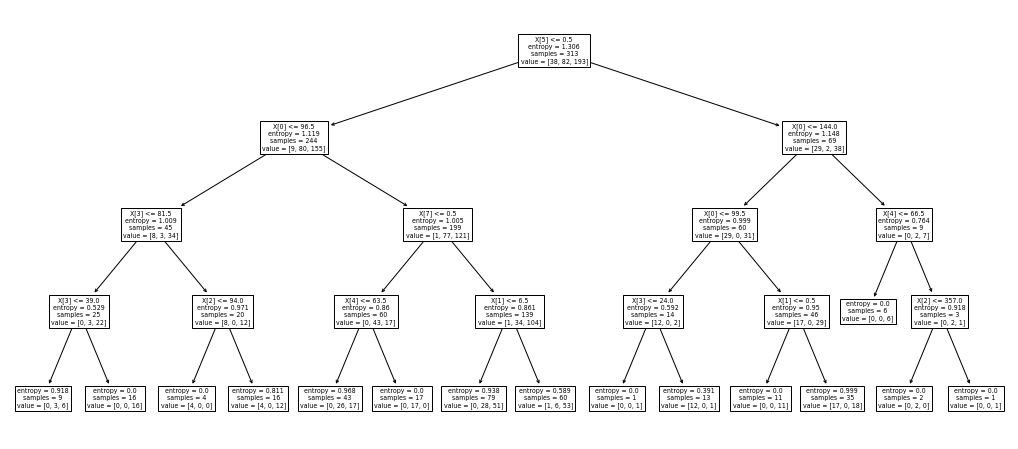

In [39]:
plt.figure(figsize=(18,8)) 
tree.plot_tree(model)
plt.show() 

# b) using Gini Criteria with train test split

In [40]:
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=4) 

In [41]:
model_gini.fit(x_train, y_train) 

DecisionTreeClassifier(max_depth=4)

In [42]:
#Prediction and computing the accuracy
pred=model.predict(x_test)
np.mean(pred==y_test) 

0.620253164556962

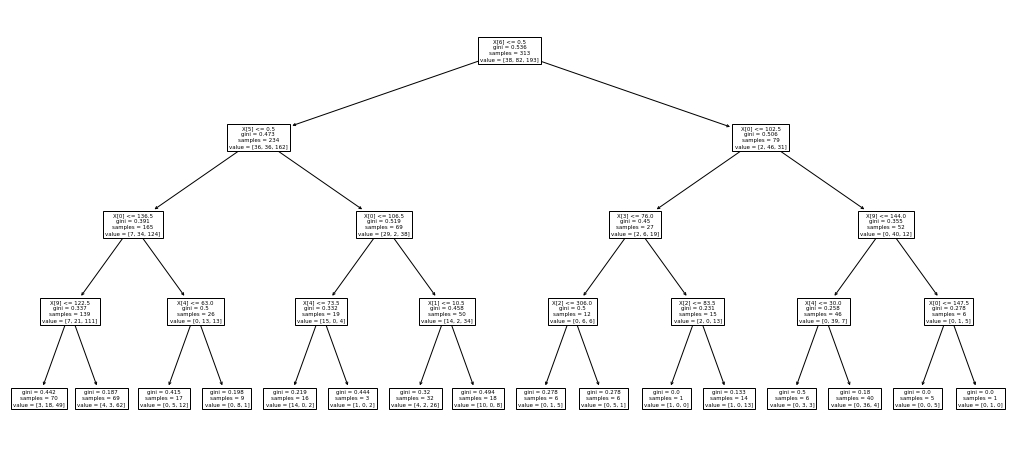

In [43]:
plt.figure(figsize=(18,8))
tree.plot_tree(model_gini)
plt.show() 

## c) Grid search for hyper parameter tuning

In [44]:
num_folds = 10
kfold = KFold(n_splits=10, shuffle=True)  

In [45]:
param_dict = {
    "criterion":["gini","entropy"],
    "max_depth":range(1,10),
    "min_samples_split":range(1,10),
    "min_samples_leaf":range(1,10)
}

In [46]:
DT = DecisionTreeClassifier()
grid = GridSearchCV(DT, param_grid=param_dict, cv=kfold)

grid.fit(model_data_x, model_data_y) 

GridSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=True),
             estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 10),
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(1, 10)})

In [47]:
print(grid.best_score_)
print(grid.best_params_)  

0.7192307692307692
{'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 7, 'min_samples_split': 3}


## d) Building final model on grid.best_params_ parameters

In [48]:
model_kf =grid.best_estimator_
model_kf.fit(model_data_x, model_data_y)

results = cross_val_score(model_kf, model_data_x, model_data_y, cv=kfold)
print('Accuracy with k fold validation', np.round(results.mean(),3))  

Accuracy with k fold validation 0.658


In [49]:
model = grid.best_estimator_ 

pred=model.predict(x_test)
print('Accuracy with train test split:', accuracy_score(y_test, pred)) 

Accuracy with train test split: 0.7468354430379747


In [50]:
model 

DecisionTreeClassifier(max_depth=4, min_samples_leaf=7, min_samples_split=3)

In [51]:
print(classification_report(y_test, pred)) 

              precision    recall  f1-score   support

           0       0.50      0.25      0.33         8
           1       0.71      0.63      0.67        19
           2       0.78      0.87      0.82        52

    accuracy                           0.75        79
   macro avg       0.66      0.58      0.61        79
weighted avg       0.73      0.75      0.73        79



<AxesSubplot:>

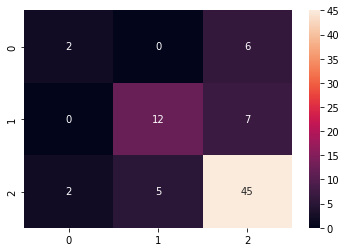

In [52]:
sns.heatmap(confusion_matrix(y_test, pred), annot=True) 

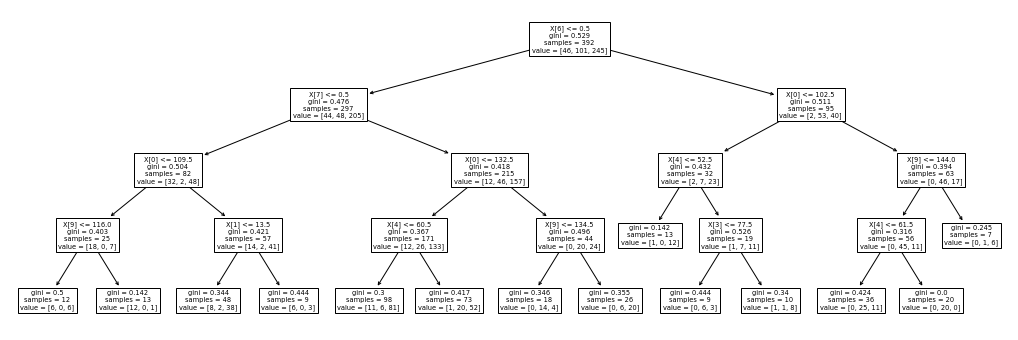

In [53]:
#PLot the decision tree
plt.figure(figsize=(18,6))
tree.plot_tree(model)

plt.show()

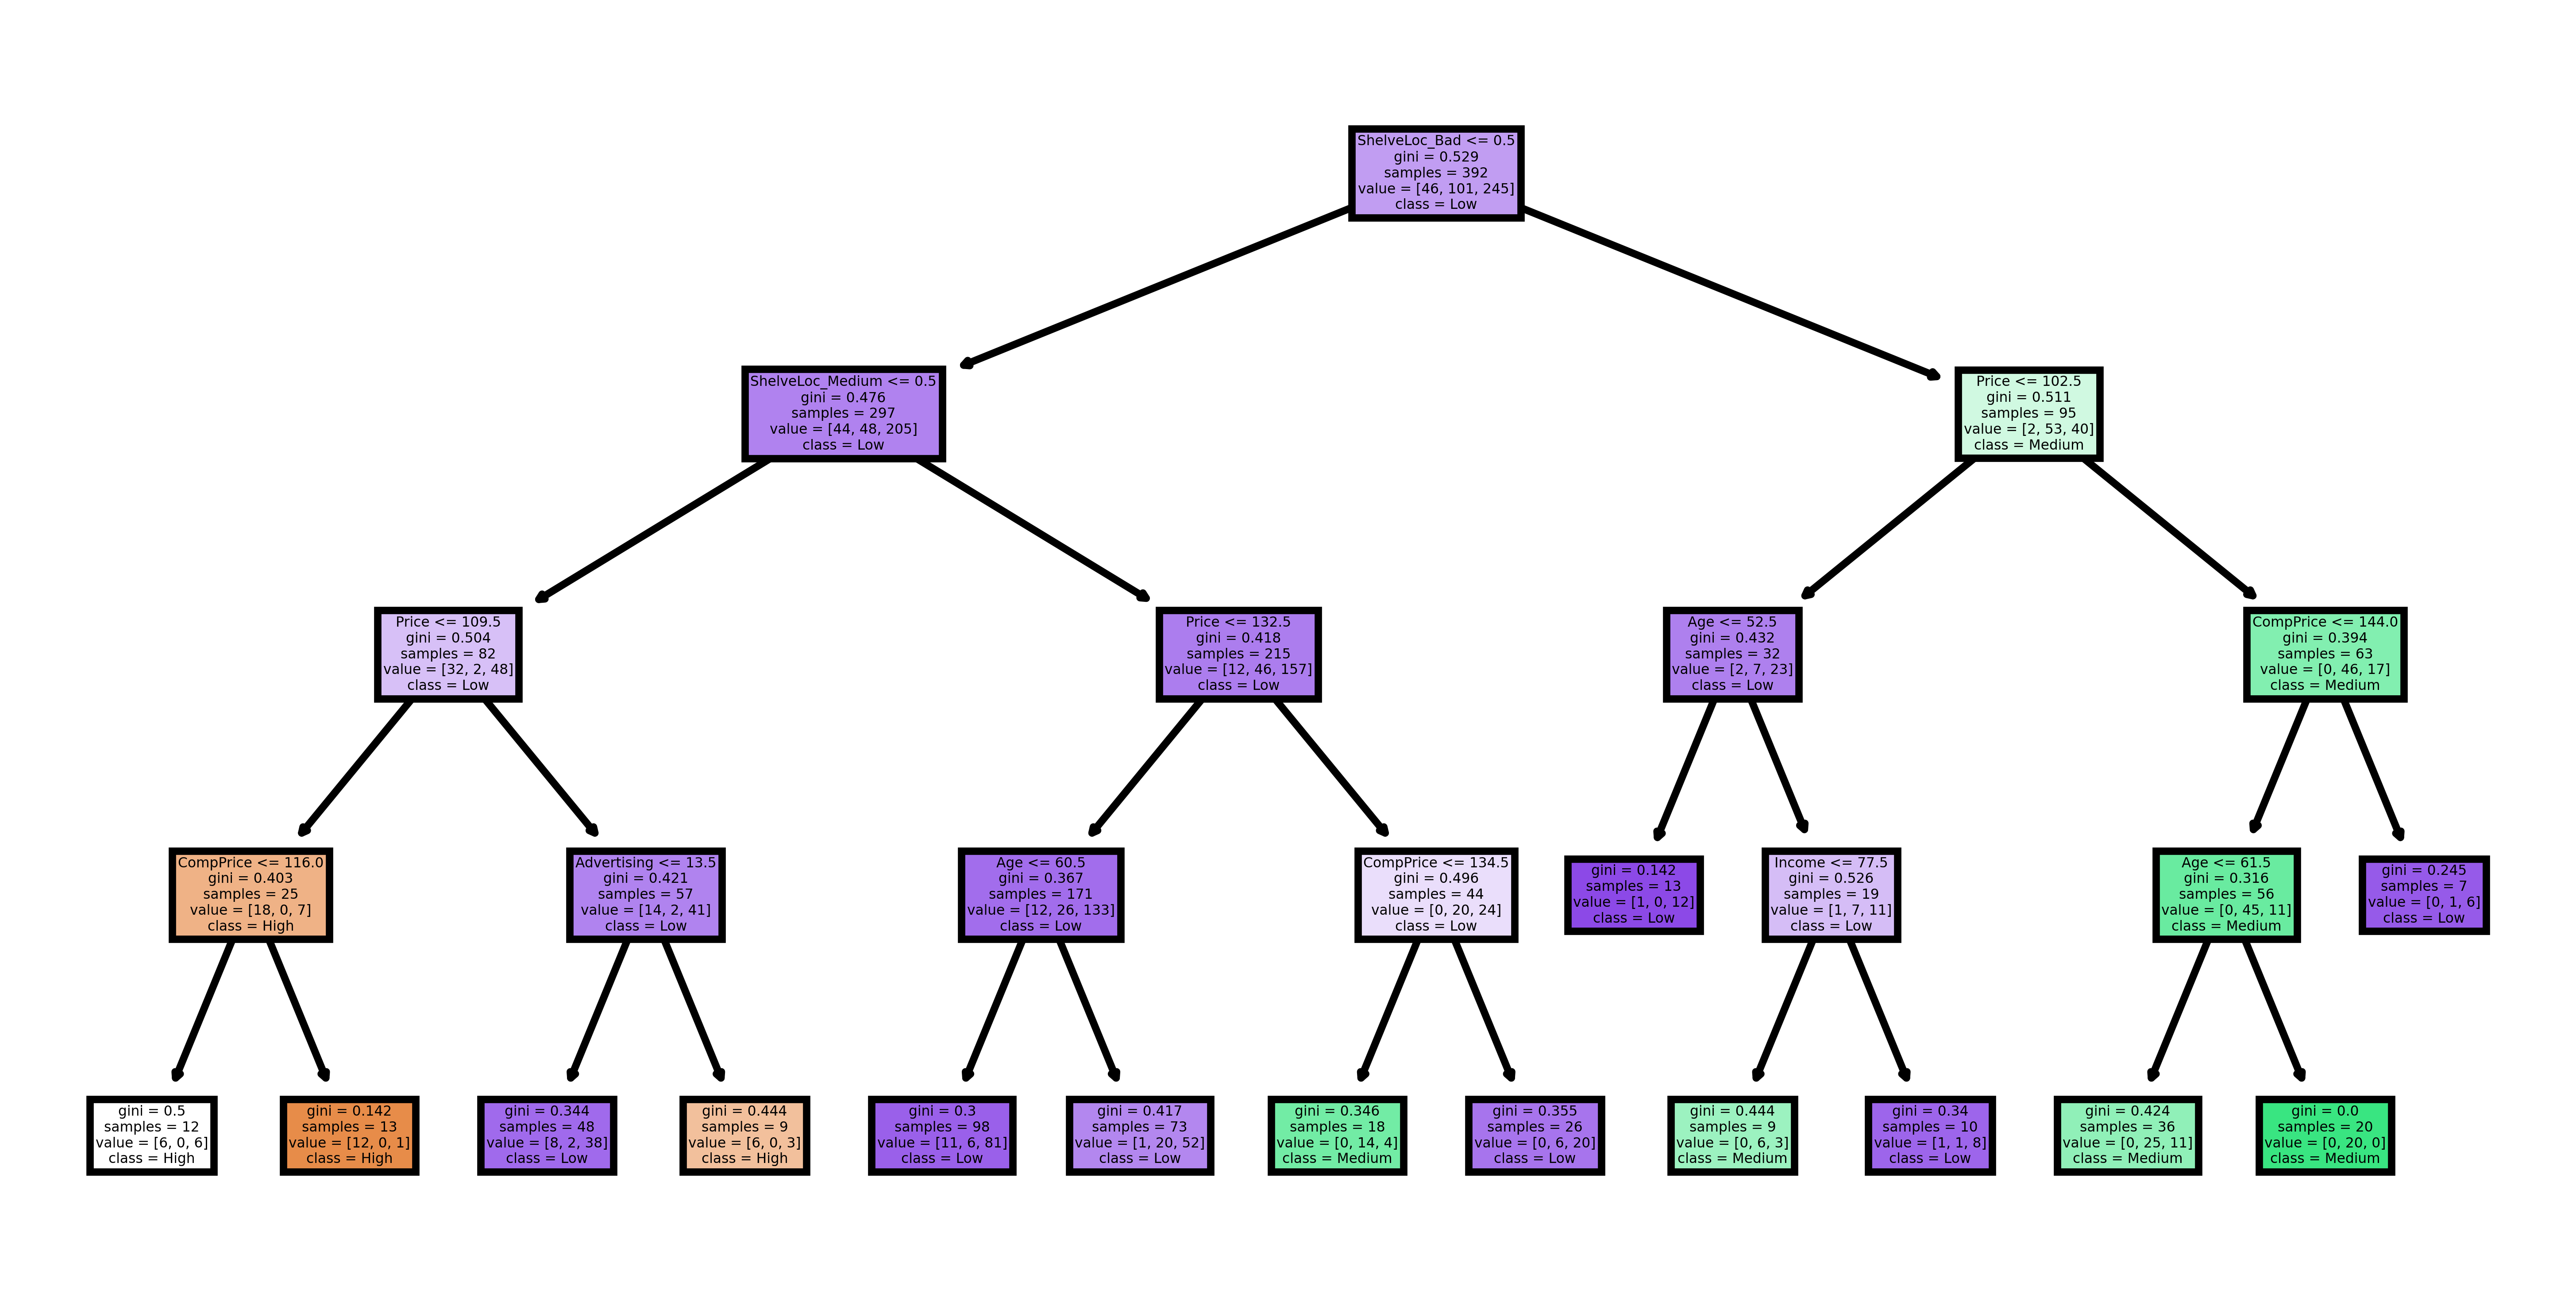

In [55]:
fn=['Price','Advertising','Population','Income','Age','ShelveLoc_Good','ShelveLoc_Bad','ShelveLoc_Medium','US_No','CompPrice']
cn=['High', 'Medium', 'Low']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (6,3), dpi=1200)
tree.plot_tree(model_kf,
               feature_names = fn, 
               class_names=cn,
               filled = True);
plt.savefig('tree.png',format='png',bbox_inches = "tight") 

# Thank You